<a href="https://colab.research.google.com/github/mskbasha/Distance-Detection-Using-ComputerVision/blob/main/First%20Trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
import io
import tarfile

url = "https://documents.epfl.ch/groups/c/cv/cvlab-multiview-car-dataset/www/epfl_gims08.tar.gz"
filename = "cars.tar.gz"

response = requests.get(url, stream=True)

total_size = int(response.headers.get("Content-Length", 0))
block_size = 1024
progress = 0

with open(filename, "wb") as f:
    for data in response.iter_content(block_size):
        progress += len(data)
        f.write(data)
        print("\rProgress: {:.2f}%".format(100 * progress / total_size), end="")

with tarfile.open(filename, "r") as z:
    z.extractall("/content/drive/MyDrive/ComputerVision/cars")

Progress: 100.00%

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
images=[]
for i in range(1,21):
  with open(f"/content/drive/MyDrive/ComputerVision/cars/epfl-gims08/tripod-seq/bbox_{str(i).zfill(2)}.txt") as f:
    lines=f.readlines()
    images.append([])
    for ind,line in enumerate(lines):
      coordinates=list(map(float,line.split()))
      coordinates=[int(i) for i in coordinates]
      image=cv2.imread(f"/content/drive/MyDrive/ComputerVision/cars/epfl-gims08/tripod-seq/tripod_seq_{str(i).zfill(2)}_{str(ind+1).zfill(3)}.jpg")
      images[-1].append(image[coordinates[1]:coordinates[1]+coordinates[3],coordinates[0]:coordinates[0]+coordinates[2]])

In [ ]:
cropped_images=[]
for i in images:
  cropped_images.append([])
  for j in i:
    cropped_images[-1].append(tf.image.resize(np.flip(j,axis=2)/255, (80,120)))

In [ ]:
with open("/content/drive/MyDrive/ComputerVision/cars/epfl-gims08/tripod-seq/tripod-seq.txt") as f:
  lines=f.readlines()
  l=[]
  number_of_frames=list(map(int,lines[1].split()))
  frames_with_turns=list(map(int,lines[4].split()))
  frames_with_starting=list(map(int,lines[5].split()))
  rotation=list(map(int,lines[6].split()))
  for i in range(20):
    l.append([number_of_frames[i],frames_with_turns[i],frames_with_starting[i],rotation[i]])


In [ ]:
angles=[]
for i in l:
  angles.append([])
  turn_per_frame=float(360/(i[1]))
  angle=360-turn_per_frame*i[2]
  for j in range(i[0]):
    if angle>=360:
      angle=0
    angles[-1].append(angle)
    angle+=turn_per_frame

In [ ]:
y=[]
for i in angles:
  for j in i:
    y.append(j)
x=[]
for i in cropped_images:
  for j in i:
    x.append(j*255)

In [ ]:
y=np.array(y,dtype='int')
x=np.array(x,dtype='uint8')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model.summary()

In [ ]:
# y_train=y_train/360
# y_test=y_test/360

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200)

In [ ]:
y_pred=model.predict(x_test)

11/11 [==============================] - 0s 34ms/step


In [ ]:
y_test[10],y_pred[10]

(205, array([163.44037], dtype=float32))

In [1]:
import cv2
from progressbar import progressbar
import numpy as np
import tensorflow as tf
images=[]
pb=progressbar(1)
for i in range(1,21):
  print(i)  # pb.print(i,21)
  with open(f"/content/drive/MyDrive/ComputerVision/cars/epfl-gims08/tripod-seq/bbox_{str(i).zfill(2)}.txt") as f:
    lines=f.readlines()
    images.append([])
    for ind,line in enumerate(lines):
      coordinates=list(map(float,line.split()))
      coordinates=[int(i) for i in coordinates]
      image=cv2.imread(f"/content/drive/MyDrive/ComputerVision/cars/epfl-gims08/tripod-seq/tripod_seq_{str(i).zfill(2)}_{str(ind+1).zfill(3)}.jpg")
      images[-1].append(image[coordinates[1]:coordinates[1]+coordinates[3],coordinates[0]:coordinates[0]+coordinates[2]])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [ ]:
# https://towardsdatascience.com/depth-estimation-1-basics-and-intuition-86f2c9538cd1

In [2]:
cropped_images=[]
for i in images:
  cropped_images.append([])
  for j in i:
    cropped_images[-1].append(tf.image.resize(np.flip(j,axis=2)/255, (80,120)))

In [3]:
with open("/content/drive/MyDrive/ComputerVision/cars/epfl-gims08/tripod-seq/tripod-seq.txt") as f:
  lines=f.readlines()
  l=[]
  number_of_frames=list(map(int,lines[1].split()))
  frames_with_turns=list(map(int,lines[4].split()))
  frames_with_starting=list(map(int,lines[5].split()))
  rotation=list(map(int,lines[6].split()))
  for i in range(20):
    l.append([number_of_frames[i],frames_with_turns[i],frames_with_starting[i],rotation[i]])


In [4]:
angles=[]
for i in l:
  angles.append([])
  turn_per_frame=float(360/(i[1]))
  angle=360-turn_per_frame*i[2]
  for j in range(i[0]):
    if angle>=360:
      angle=0
    angles[-1].append(angle)
    angle+=turn_per_frame

In [5]:
y=[]
for i in angles:
  for j in i:
    y.append(j)
x=[]
for i in cropped_images:
  for j in i:
    x.append(j*255)

In [6]:
y=np.array(y,dtype='int')
x=np.array(x,dtype='uint8')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[0].shape

(80, 120, 3)

In [11]:
from tensorflow import keras
layer1=tf.keras.applications.MobileNet(
    input_shape=(80,120,3),
    alpha=1.0,
    include_top=False,
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

model=keras.Sequential([
    layer1,
    
    keras.layers.Flatten(),
    # keras.layers.Dense(1000,activation='relu'),
    # keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1,activation='relu')
])
for layer in model.layers:
  if isinstance(layer,tf.keras.layers.Conv2D):
    layer.kernal_regularizer=tf.keras.regularizers.l2(0.1) 

17225924/17225924 [==============================] - 2s 0us/step


In [12]:
model.compile(optimizer='adam',loss='mae')

In [13]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
62/62 [==============================] - 36s 52ms/step - loss: 72.0301 - val_loss: 88.3241
Epoch 2/50
62/62 [==============================] - 2s 32ms/step - loss: 25.7874 - val_loss: 53.9421
Epoch 3/50
62/62 [==============================] - 2s 34ms/step - loss: 17.4715 - val_loss: 58.1998
Epoch 4/50
62/62 [==============================] - 2s 32ms/step - loss: 15.8685 - val_loss: 35.0899
Epoch 5/50
62/62 [==============================] - 2s 30ms/step - loss: 14.1292 - val_loss: 23.2862
Epoch 6/50
62/62 [==============================] - 2s 31ms/step - loss: 11.4892 - val_loss: 16.3149
Epoch 7/50
62/62 [==============================] - 2s 31ms/step - loss: 9.0537 - val_loss: 19.9314
Epoch 8/50
62/62 [==============================] - 2s 32ms/step - loss: 11.4861 - val_loss: 20.6142
Epoch 9/50
62/62 [==============================] - 2s 33ms/step - loss: 9.0480 - val_loss: 15.7145
Epoch 10/50
62/62 [==============================] - 2s 35ms/step - loss: 7.3248 - val_loss:

In [17]:
model.save("/content/drive/MyDrive/ComputerVision/Mobilenet(lowerversion).h5")

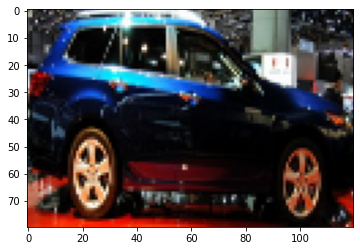

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [15]:
model.predict(x_test[1:4]),y_test[1:4]

1/1 [==============================] - 1s 764ms/step


(array([[ 95.875786],
        [ 53.341972],
        [347.74176 ]], dtype=float32), array([ 95,  55, 354]))

In [16]:
len(x_test)

345